Based on the exploration we did, the dataset located at Data_Anaylsis\Python\Datasets\Gaana\songs.csv contains information about songs from Gaana. Here's a description of the columns:

name: The name of the song.
singer: The name(s) of the singer(s) of the song. This column can contain multiple singers separated by a pipe |.
singer_id: A unique identifier for the singer(s). Similar to the singer column, it can contain multiple singer IDs separated by a pipe |.
duration: The duration of the song in a time format (e.g., 'MM:SS' or 'HH:MM:SS').
link: The unique link to the song on Gaana. This column was used to identify and remove duplicate songs.
language: The language of the song.
The dataset has been cleaned by removing duplicates based on the 'link' and a combination of 'name', 'singer', 'singer_id', and 'duration'. A new column duration_in_sec was also added which converts the duration to seconds.

# 1. Overall Data Exploration


>> ## 1.1) Loading Library

In [2]:
import pandas as pd
import numpy as np

>> ## 1.2) Loading the database 

In [3]:
df = pd.read_csv('C:\GeekforGeeks\Data_Anaylsis\Python\Datasets\Gaana\songs.csv')

In [4]:
df

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu
...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali


>> ## 1.3) Further Overall Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41355 entries, 0 to 41354
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       41355 non-null  object
 1   singer     41355 non-null  object
 2   singer_id  41355 non-null  object
 3   duration   41355 non-null  object
 4   link       41355 non-null  object
 5   language   41355 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


In [6]:
df.shape

(41355, 6)

In [7]:
df.describe()

,name,singer,singer_id,duration,link,language
count,41355,41355,41355,41355,41355,41355
unique,31534,6196,6580,1309,36361,16
top,O Mere Dil Ke Chain,Lata Mangeshkar,/artist/lata-mangeshkar,03:02,/aap-ke-aa-jane-se-1,Telugu
freq,26,1410,1410,447,2,4996


In [8]:
df[df['language'] == 'Urdu']

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu
...,...,...,...,...,...,...
3111,Salam,Farhat Shuja,/artist/farhat-shuja,10:04,/salam-44,Urdu
3112,Thumri Tilang - Sajia Akeli Dukh De,Badar Uz Zaman|Qamar Uz Zaman,/artist/badar-uz-zaman-1|/artist/qamar-uz-zaman-1,06:11,/thumri-tilang-sajia-akeli-dukh-de,Urdu
3113,Sanwar Sanwar Kar,Mumtaz Shirazi,/artist/mumtaz-shirazi,04:45,/sanwar-sanwar-kar,Urdu
3114,Jo Teri Sana Mein,Muzaffar Warisi,/artist/muzaffar-warisi,06:16,/jo-teri-sana-mein,Urdu


In [9]:
df['language'].value_counts()

language
Telugu        4996
Hindi         4993
Old           4993
Marathi       4699
Tamil         4677
Punjabi       3818
Kannada       3559
Urdu          3116
Gujarati      2115
Bengali        958
Odia           940
Assamese       724
Rajasthani     541
Bhojpuri       519
Malayalam      479
Haryanvi       228
Name: count, dtype: int64

In [10]:
len(df[df['language'] == 'Hindi'])

4993

In [11]:
for i in df['language'].unique():
    print(i, len(df[df['language'] == i ]))

Urdu 3116
Gujarati 2115
Tamil 4677
Kannada 3559
Rajasthani 541
Haryanvi 228
Punjabi 3818
Hindi 4993
Old 4993
Malayalam 479
Marathi 4699
Telugu 4996
Odia 940
Bhojpuri 519
Assamese 724
Bengali 958


In [13]:
### Filter out a value where Singer is Jagjit singh and the language is urdu

df[(df['singer'] == 'Jagjit Singh')]['singer_id'].value_counts()

singer_id
/artist/jagjeet-singh-1    172
Name: count, dtype: int64

>> ## 1.4) Checking for NULL Values

In [14]:
df.isnull().sum()

name         0
singer       0
singer_id    0
duration     0
link         0
language     0
dtype: int64

>> ## 1.5) Checking for any Duplicates

In [15]:
df['link'].duplicated().sum()

np.int64(4994)

In [16]:
df[df['link'].duplicated()]

,name,singer,singer_id,duration,link,language
23047,Bheegi Bheegi Raaton Mein,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,03:54,/bheegi-bheegi-raaton-mein,Old
23048,Aap Ki Ankhon Mein Kuch,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,04:09,/aap-ki-ankhon-mein-kuchh,Old
23049,Tum Aa Gaye Ho Noor Aa Gaya,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,04:13,/tum-aa-gaye-ho-noor-aa-gaya,Old
23050,Hamen Tumse Pyar Kitna,Kishore Kumar,/artist/kishore-kumar,04:02,/hamen-tumse-pyar-kitna-2,Old
23051,Tere Bina Zindagi Se,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,05:54,/tere-bina-zindagi-se-1,Old
...,...,...,...,...,...,...
28036,Apne Hathon Ki Lakiron Mein,Manhar Udhas,/artist/manhar-udhas,06:43,/apne-hathon-ki-lakiron-mein,Old
28037,Gori Chalo Na Hans Ki Chaal,Asha Bhosle|Mohammed Rafi,/artist/asha-bhosle-1|/artist/mohammad-rafi,03:33,/gori-chalo-na-hans-ki-chaal,Old
28038,Zindagi Ki Na Toote Ladi,Lata Mangeshkar|Nitin Mukesh,/artist/lata-mangeshkar|/artist/nitin-mukesh,07:02,/zindagi-ki-na-toote-ladi-2,Old
28039,Diwana Leke Aaya Hai,Kishore Kumar,/artist/kishore-kumar,04:39,/diwana-leke-aaya-hai-7,Old


In [17]:
df_ = df[df['link'].duplicated()]

In [18]:
df_.describe()

,name,singer,singer_id,duration,link,language
count,4994,4994,4994,4994,4994,4994
unique,3821,923,927,527,4994,2
top,O Mere Dil Ke Chain,Lata Mangeshkar,/artist/lata-mangeshkar,04:01,/intheraa-ee-jeevitham,Old
freq,13,554,554,55,1,4993


In [19]:
len(df[df['language'] == 'Old'])

4993

In [20]:
df['language'].unique()

array(['Urdu', 'Gujarati', 'Tamil', 'Kannada', 'Rajasthani', 'Haryanvi',
       'Punjabi', 'Hindi', 'Old', 'Malayalam', 'Marathi', 'Telugu',
       'Odia', 'Bhojpuri', 'Assamese', 'Bengali'], dtype=object)

In [21]:
df[df['language'] == 'Old']['singer'].value_counts()

singer
Lata Mangeshkar                              554
Kishore Kumar                                550
Mohammed Rafi                                503
Asha Bhosle                                  237
Kishore Kumar|Lata Mangeshkar                225
                                            ... 
Manna Dey|Asha Bhosle                          1
Rajesh Khanna|Kishore Kumar                    1
Sharad Kumar|Amitabh Bachchan|Asha Bhosle      1
Asha Bhosle|Kamal Barot|Usha Mangeshkar        1
Uttara Kelkar|Vijay Benedict                   1
Name: count, Length: 922, dtype: int64

>>>> * Checking for Proof that are the songs of OLD and Hindi Same

In [24]:
df_ = df[(df['language'] == 'Hindi') | (df['language'] == 'Old')]
df_

,name,singer,singer_id,duration,link,language
18054,Bheegi Bheegi Raaton Mein,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,03:54,/bheegi-bheegi-raaton-mein,Hindi
18055,Aap Ki Ankhon Mein Kuch,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,04:09,/aap-ki-ankhon-mein-kuchh,Hindi
18056,Tum Aa Gaye Ho Noor Aa Gaya,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,04:13,/tum-aa-gaye-ho-noor-aa-gaya,Hindi
18057,Hamen Tumse Pyar Kitna,Kishore Kumar,/artist/kishore-kumar,04:02,/hamen-tumse-pyar-kitna-2,Hindi
18058,Tere Bina Zindagi Se,Kishore Kumar|Lata Mangeshkar,/artist/kishore-kumar|/artist/lata-mangeshkar,05:54,/tere-bina-zindagi-se-1,Hindi
...,...,...,...,...,...,...
28035,Nigahen Milane Ko Jee Chahta Hai,Asha Bhosle,/artist/asha-bhosle-1,06:34,/nigahen-milane-ko-jee-chahta-hai-3,Old
28036,Apne Hathon Ki Lakiron Mein,Manhar Udhas,/artist/manhar-udhas,06:43,/apne-hathon-ki-lakiron-mein,Old
28037,Gori Chalo Na Hans Ki Chaal,Asha Bhosle|Mohammed Rafi,/artist/asha-bhosle-1|/artist/mohammad-rafi,03:33,/gori-chalo-na-hans-ki-chaal,Old
28038,Zindagi Ki Na Toote Ladi,Lata Mangeshkar|Nitin Mukesh,/artist/lata-mangeshkar|/artist/nitin-mukesh,07:02,/zindagi-ki-na-toote-ladi-2,Old


In [25]:
df_.duplicated().sum()

np.int64(0)

In [26]:
df_['link'].duplicated().sum()

np.int64(4993)

>> ## 1.6) Removing Duplicates

In [27]:
df.drop_duplicates(subset = 'link', inplace = True)
df

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu
...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali


In [28]:
df.describe()

,name,singer,singer_id,duration,link,language
count,36361,36361,36361,36361,36361,36361
unique,31534,6196,6580,1309,36361,15
top,Padhyams,S. P. Balasubrahmanyam,/artist/s-p-balasubrahamanyam,03:02,/tomar-je-oi-haater-mala,Telugu
freq,20,1151,1155,417,1,4995


In [29]:
df['language'].unique()

array(['Urdu', 'Gujarati', 'Tamil', 'Kannada', 'Rajasthani', 'Haryanvi',
       'Punjabi', 'Hindi', 'Malayalam', 'Marathi', 'Telugu', 'Odia',
       'Bhojpuri', 'Assamese', 'Bengali'], dtype=object)

# 2. Exploring Every Columns

>> ## 2.1) Exploring Names

In [30]:
df['name'].describe()

count        36361
unique       31534
top       Padhyams
freq            20
Name: name, dtype: object

>>>> #### ! We removed duplicates based on name, singer, singer_id and Duration 

In [31]:
df.drop_duplicates(subset = ['name','singer','singer_id','duration'], inplace = True)
df

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu
...,...,...,...,...,...,...
41349,Amar Kantho Hote Gaan Ke Nilo,Hemant Kumar,/artist/hemanta-mukherjee,02:57,/amar-kantho-hote-gaan-ke-nilo,Bengali
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali


In [32]:
df.describe()

,name,singer,singer_id,duration,link,language
count,32949,32949,32949,32949,32949,32949
unique,31534,6196,6580,1309,32949,15
top,Padhyams,P. Susheela,/artist/p-suseela-2,04:00,/tomar-je-oi-haater-mala,Telugu
freq,19,938,938,377,1,4635


In [35]:
df[df['name'] == 'A Aa E Ee Kannadada']

,name,singer,singer_id,duration,link,language
11261,A Aa E Ee Kannadada,S. Janaki|B.K. Sumitra|R.N. Jayagopal,/artist/s-janaki|/artist/bk-sumitra-2|/artist/...,03:15,/a-aa-e-ee-kannadada-1,Kannada


In [36]:
df['name'].value_counts()

name
Padhyams                         19
Ahe Ramahari                     12
Tuma Gaan Mahu Machhi            11
Music                            10
Film Story                        8
                                 ..
Socha Nahin Achha Bura            1
Hazaron Khwahishen Aesi           1
Raat Bhi Neend Bhi Kahani Bhi     1
Ya Mujhe Afsare Sahi              1
Kabse Hoon Kya Bataon             1
Name: count, Length: 31534, dtype: int64

>> ## 2.2) Singer

In [37]:
df['singer'].value_counts()

singer
P. Susheela                                  938
S. P. Balasubrahmanyam                       931
Asha Bhosle                                  880
Lata Mangeshkar                              725
S. Janaki                                    616
                                            ... 
Calcutta Youth Choir                           1
Nirmalendu Choudhury                           1
Bishnupada Das                                 1
Madhuri Chatterjee                             1
P. Susheela|S. P. Balasubrahmanyam|Chorus      1
Name: count, Length: 6196, dtype: int64

In [38]:
df['singer_id'].value_counts()

singer_id
/artist/p-suseela-2                      938
/artist/s-p-balasubrahamanyam            935
/artist/asha-bhosle-1                    880
/artist/lata-mangeshkar                  725
/artist/s-janaki                         616
                                        ... 
/artist/calcutta-youth-choir               1
/artist/nirmalendu-choudhury               1
/artist/bishnupada-das                     1
/artist/madhuri-chatterjee                 1
/artist/vijay-yesudas|/artist/mahathi      1
Name: count, Length: 6580, dtype: int64

In [39]:
df['duration'].value_counts()

duration
04:00    377
03:02    365
05:00    348
03:21    329
03:23    307
        ... 
35:44      1
26:09      1
41:01      1
23:31      1
35:48      1
Name: count, Length: 1309, dtype: int64

In [40]:
df['link'].value_counts()

link
/tomar-je-oi-haater-mala               1
/dil-e-nadan-tujhe-3                   1
/agar-hum-kahen-aur-woh-muskura-den    1
/unke-dekhe-se                         1
/yeh-na-thi-hamari-qismat-2            1
                                      ..
/naksh-rariyaaadi-hai-kiski            1
/punjabi-tappe-live                    1
/naina-tose-lage                       1
/ibteda                                1
/sunte-hai-ki-mil-jaati-hai-live       1
Name: count, Length: 32949, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='language'>

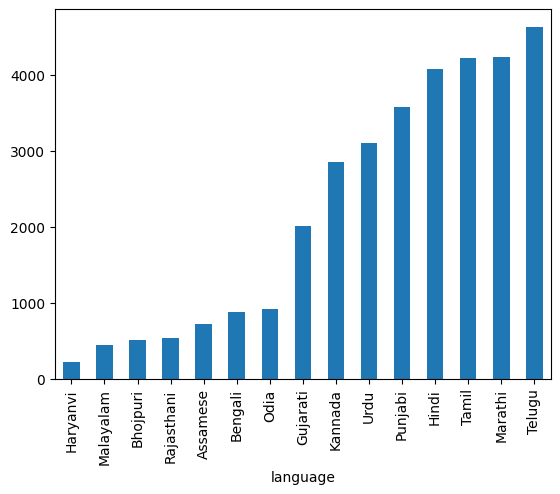

In [41]:
df['language'].value_counts().sort_values(ascending = True).plot(kind = 'bar')

# 3. Data Cleaning

>> ## 3.1) Cleaning Duration

In [42]:
for i in df['duration'][:10]:
    print(i, int(i.split(':')[0])*60 + int(i.split(':')[1]))

05:00 300
06:26 386
03:41 221
04:26 266
05:39 339
07:59 479
04:48 288
05:21 321
03:09 189
04:24 264


In [44]:
duration = []

for i in df['duration']:
    min = int(i.split(':')[0])
    sec = int(i.split(':')[1])
    duration.append(min*60 + sec)


df['duration_in_sec'] = duration
df

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,339
...,...,...,...,...,...,...,...
41349,Amar Kantho Hote Gaan Ke Nilo,Hemant Kumar,/artist/hemanta-mukherjee,02:57,/amar-kantho-hote-gaan-ke-nilo,Bengali,177
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali,236
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali,456
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali,269


In [45]:
df['duration_in_sec'].sort_values(ascending = False)

818      3595
14098    3588
13282    3587
39216    3581
30833    3566
         ... 
9480       19
6500       18
36778      18
22952      17
35561      17
Name: duration_in_sec, Length: 32949, dtype: int64

In [46]:
duration = []

for i in df['duration']:
    if len(i.split(':')) == 3:
        print(i)

01:00:21
01:00:09
01:00:08
01:09:52
01:15:45
01:05:53
01:08:04
01:00:39
05:43:00
06:03:00
01:00:45
05:48:00
05:17:00
04:20:00
06:52:00
06:04:00
05:25:00
05:05:00
06:02:00
01:16:00
05:16:00
05:33:00
05:00:00
01:23:22
05:00:00
07:08:00
01:02:27
01:01:08
01:04:36
01:00:05
01:07:13
02:01:49
02:04:37
02:22:18
01:09:22
01:06:19
02:17:29
02:26:54
01:04:35
01:49:40
02:37:42
02:05:46
02:13:06
02:20:03
01:07:12
01:54:41
02:27:29
02:04:16
02:20:24
01:02:51
02:53:29
01:06:19
01:52:12
01:07:38
01:05:27
01:10:41
01:01:05
02:25:50
01:01:00


In [48]:
duration = []

for i in df['duration']:
    if len(i.split(':')) == 2:
        mins = int(i.split(':')[0])
        secs = int(i.split(':')[1])
        duration.append(mins*60 + secs)
    
    elif len(i.split(':')) == 3:
        hrs = int(i.split(':')[0])
        mins = int(i.split(':')[1])
        secs = int(i.split(':')[2])
        duration.append(hrs * 60 * 60 + min * 60 + secs)

df['duration_in_sec'] = duration
df

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,339
...,...,...,...,...,...,...,...
41349,Amar Kantho Hote Gaan Ke Nilo,Hemant Kumar,/artist/hemanta-mukherjee,02:57,/amar-kantho-hote-gaan-ke-nilo,Bengali,177
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali,236
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali,456
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali,269


In [49]:
df['duration_in_sec'].sort_values(ascending = False)

16093    25380
15259    21780
14624    21780
15000    21780
15025    21780
         ...  
9480        19
6500        18
36778       18
22952       17
35561       17
Name: duration_in_sec, Length: 32949, dtype: int64

# 4. Data Analysis

KPI

* Overall Analysis

  1. Total Songs
  2. Total Singers
  3. Languages
  4. Total Songs Played
  5. Play in Hours | 100 Million Hours + Streamed
  6. Genre

* Yearly Analysis
  1. Top Song of the Year
  2. Weekly Top Songs

-- Monthly Analysis


-- Daily Analysis

> ## 4.1) Total Number of Unque Songs

In [52]:
total_songs = df['name'].nunique()
print("Total Number of Songs : ", total_songs)

Total Number of Songs :  31534


In [53]:
df['link'].nunique()

32949

> ## 4.2) Total Unique Languages

In [58]:
df['language'].nunique()


15

> ## 4.3) Total Unique Singers

In [61]:
df['singer'].nunique()

6196

In [62]:
df['singer_id'].nunique()

6580

In [66]:
df.head(5)

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,339


In [67]:
['/artist/chitra-singh','artist/jagjeet-singh-1'] + ['/artist/chitra-singh' 'artist/jagjeet-singh-1']

['/artist/chitra-singh',
 'artist/jagjeet-singh-1',
 '/artist/chitra-singhartist/jagjeet-singh-1']

In [68]:
lst = []

for i in df['singer_id']:
    lst = lst + i.split('|')

print(len(set(lst)))

4528


In [69]:
df['singer_id'].str.split('|').explode().nunique()

4528

In [70]:
df['singer'].str.split('|').explode().nunique()

3940

> ## 4.4) Accumulative Duration of a Song on Gaana

In [79]:
df['duration_in_sec'].sum()

np.int64(10275715)

In [85]:
total_second = df['duration_in_sec'].sum()
days = total_second // (24 * 3600)
remaining_seconds_after_days = total_second % (24 * 3600)
hours = remaining_seconds_after_days // 3600
remaining_seconds_after_hours = remaining_seconds_after_days % 3600
minutes = remaining_seconds_after_hours // 60
seconds = remaining_seconds_after_hours % 60
print(f"Total Duration :  {days} days {hours} hours {minutes} minutes and {seconds} seconds") 

Total Duration :  118 days 22 hours 21 minutes and 55 seconds


> ## 4.5) Top Songs 

In [86]:
df.head(2)

,name,singer,singer_id,duration,link,language,duration_in_sec
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,386


<Axes: xlabel='name'>

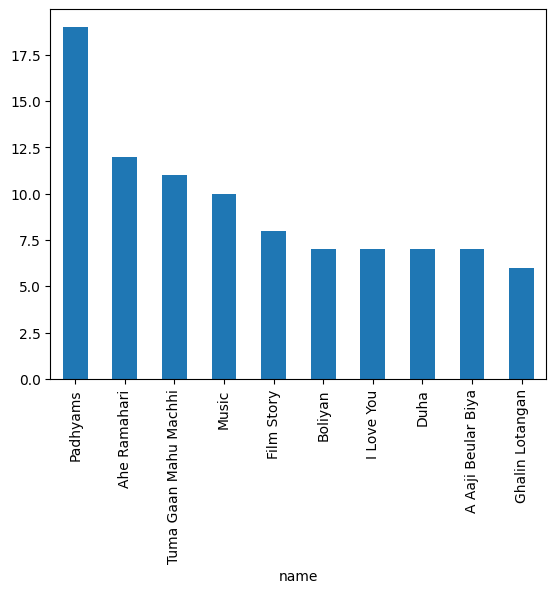

In [88]:
df.groupby('name')['name'].count().sort_values(ascending = False).head(10).plot(kind = 'bar')

> ## 4.6) Top 5 Languages

<Axes: xlabel='language'>

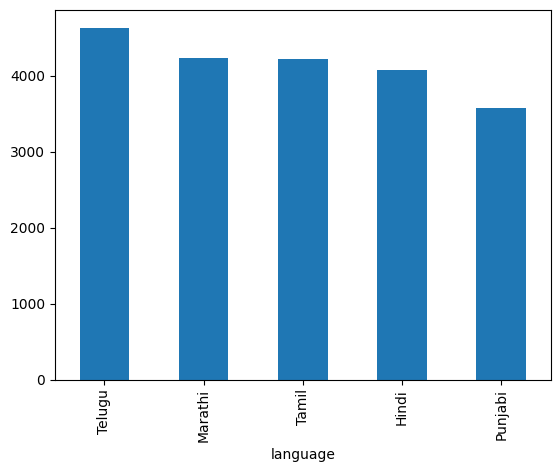

In [89]:
df.groupby('language')['language'].count().sort_values(ascending=False).head(5).plot(kind = 'bar')

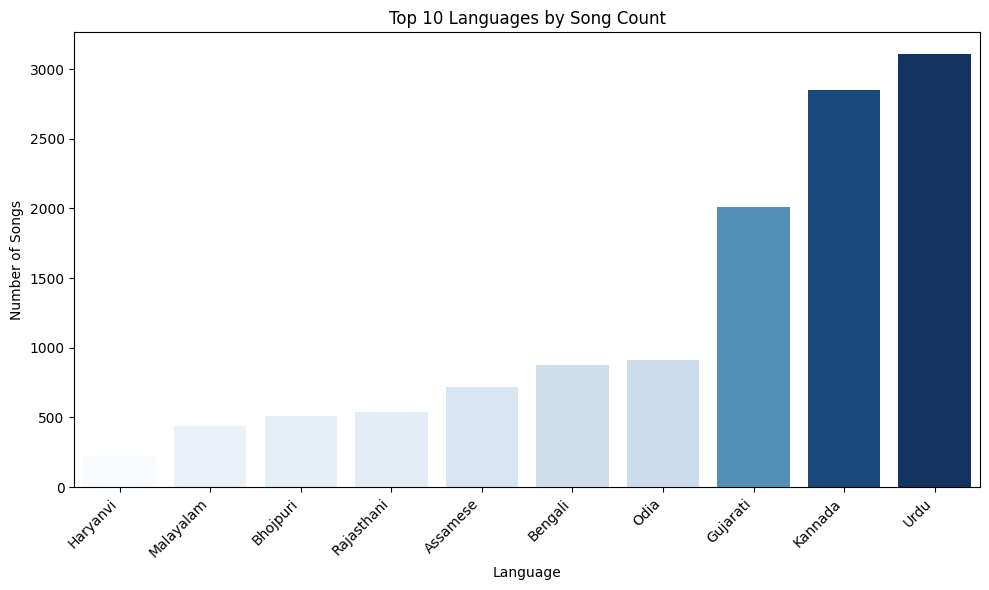

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

language_counts = df['language'].value_counts().sort_values(ascending=True)

# Select top 10 languages
top_10_languages = language_counts.head(10)

# Create a colormap from light red to dark red
cmap = plt.colormaps['Blues']

# Normalize the counts to the range [0,1] for colormapping 
norm = plt.Normalize(top_10_languages.min(), top_10_languages.max())

# Create the bar plot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_languages.index,
    y=top_10_languages.values,
    hue=top_10_languages.index,  
    palette=[cmap(norm(value)) for value in top_10_languages.values],
    legend=False 
)
plt.title('Top 10 Languages by Song Count')
plt.xlabel('Language')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

language_counts = df['language'].value_counts().sort_values(ascending=False)

# Select top 10 languages
top_10_languages = language_counts.head(10)

# Create a Plotly bar chart
fig = px.bar(x=top_10_languages.index, y=top_10_languages.values,
            labels={'x': 'Language', 'y': 'Number of Songs'},
            title='Top 10 Languages by Song Count (Plotly)',
            color=top_10_languages.values,
            color_continuous_scale='Reds') # Use 'Reds' colormap

fig.update_layout(xaxis_tickangle=-45)
fig.show()